<a href="https://colab.research.google.com/github/Mehtab23455/Boundless-Books/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/student_pass_fail_final.csv")

In [ ]:
df

,Study_Hours,Sleeping_Hours,Social_Media_Usage,Playing_Hours,Previous_Score,Attendance,Pass
0,4.370861,7.852190,0.515619,4.571494,44.0,51.0,0
1,9.556429,4.504840,4.512765,0.588755,57.0,69.0,1
2,7.587945,4.969772,2.526262,2.882582,67.0,50.0,1
3,6.387926,9.391325,4.132287,1.370276,81.0,86.0,1
4,2.404168,7.638574,NaN,2.770890,61.0,58.0,0
...,...,...,...,...,...,...,...
205,8.843145,8.175845,0.131835,4.695338,45.0,85.0,1
206,9.881982,5.761551,4.816113,3.461383,54.0,55.0,1
207,NaN,4.604668,2.569947,3.791192,43.0,NaN,0
208,6.806555,4.427132,4.311819,1.122203,59.0,96.0,1


In [ ]:
df.shape

(210, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study_Hours         204 non-null    float64
 1   Sleeping_Hours      205 non-null    float64
 2   Social_Media_Usage  205 non-null    float64
 3   Playing_Hours       205 non-null    float64
 4   Previous_Score      205 non-null    float64
 5   Attendance          204 non-null    float64
 6   Pass                210 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.6 KB


In [ ]:
df.isnull().sum()

,0
Study_Hours,6
Sleeping_Hours,5
Social_Media_Usage,5
Playing_Hours,5
Previous_Score,5
Attendance,6
Pass,0


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
print("Duplicate rows are : ",df.duplicated().sum())

Duplicate rows are :  10


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(200, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study_Hours         200 non-null    float64
 1   Sleeping_Hours      200 non-null    float64
 2   Social_Media_Usage  200 non-null    float64
 3   Playing_Hours       200 non-null    float64
 4   Previous_Score      200 non-null    float64
 5   Attendance          200 non-null    float64
 6   Pass                200 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 12.5 KB


In [ ]:
#Features and target
x=df.iloc[:,:-1] #independent variable
y=df["Pass"] #dependent variable

In [ ]:
#train-test-split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print(np.array(y_test))

[1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy


0.975

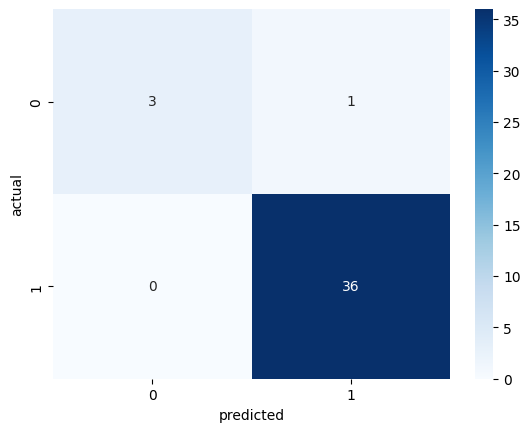

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.97      1.00      0.99        36

    accuracy                           0.97        40
   macro avg       0.99      0.88      0.92        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
def predict_student_performance():
  print("/nEnter student details for prediction: ")
  study_hours = float(input("Study Hours(1-10): "))
  sleeping_hours =  float(input("Sleeping Hours(4-10): "))
  social_media_usage = float(input("Social Media Usage(0-5): "))
  playing_hours = float(input("Playing Hours(0-5): "))
  previous_score = float(input("Previous Score (40-100): "))
  attendance = float(input("Attendance: "))


  user_data = pd.DataFrame([[study_hours, sleeping_hours, social_media_usage, playing_hours, previous_score, attendance]], columns=x.columns)

  user_data_scaled = scaler.transform(user_data)

  prediction = model.predict(user_data_scaled)[0]

  result = "Pass" if prediction == 1 else "Fail"
  print(f"/nPrediction: The student is likely to {r}")

In [ ]:
!git config --global user.email "sidhumehtab465@gmail.com"
!git config --global user.name "Mehtab23455"

In [ ]:
import pickle

# Assuming `model` is your trained model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
with open("model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


In [ ]:
import joblib

In [ ]:
# Assuming `model` is your trained model
joblib.dump(model, "model.joblib")

loaded_model = joblib.load("model.joblib")


In [ ]:
!pip install flask flask-ngrok joblib


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import joblib
import numpy as np

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Start Flask with ngrok

# Load the model
model = joblib.load("/content/model.joblib")  # Ensure path is correct

@app.route("/")
def home():
    return "Flask API is running!"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get data from request
        data = request.get_json()
        features = np.array(data["features"]).reshape(1, -1)  # Ensure correct shape

        # Make prediction
        prediction = model.predict(features).tolist()

        return jsonify({"prediction": prediction})

    except Exception as e:
        return jsonify({"error": str(e)})

# Start Flask server
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

{}